# Распределенное обучение с TensorFlow 2, Horovod

# 1. Подготовка

Импортируем библиотеки.

In [1]:
import requests
import pathlib
import client_lib # импортируем библиотеку для работы с ML Space

Устанавливаем переменные.

In [2]:
BASE_DIR = str(pathlib.Path().absolute())
print(f"Working dir: {BASE_DIR}")

Working dir: /home/jovyan/aicloud-examples/quick-start/job_launch_tf2


# 2. Запуск задачи обучения

Запускать задачу в регионе будем с помощью класса `client_lib.Job()`.

Обязательные параметры для запуска задачи обучения:
- `script` – путь к запускаемому скрипту;
- `base_image` – базовый образ, в котором будет исполняться скрипт обучения модели;
- `instance_type` – конфигурация вычислительных ресурсов, используемых для решения задач.

Подробное описание параметров – в [документации client_lib](https://cloud.ru/ru/docs/aicloud/mlspace/concepts/client-lib__job.html).

По умолчанию задачи запускаются в регионе Christofari.V100. Чтобы запустить задачу в другом регионе, необходимо указать его в параметре `region`. 

См. [Список регионов и их обозначения в client_lib](https://cloud.ru/docs/aicloud/mlspace/concepts/client-lib__job.html#row-body-region).

Для примера запустим задачу в регионе Cloud.Region.A100, обозначенном как `SR002-MT`.

Для масштабирования задачи доступны следующие параметры:

- `n_workers` – количество рабочих узлов региона, на котором будет исполняться скрипт;
- `instance_type` – конфигурация вычислительных ресурсов, используемых для решения задач.

Для выбора значения параметра `instance_type` воспользуемся методом `get_instance_types()`.

Выведем значения `instance_type` и посмотрим, какие доступны для региона `SR002-MT`.

In [3]:
client_lib.get_instance_types(regions="SR002-MT")

┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━┳━━━━━┓
┃ region   ┃ instance_type           ┃ memory ┃ cpu ┃ gpu ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━╇━━━━━┩
│ SR002-MT │ a100.1gpu.40            │ 230Gi  │ 12  │ 1   │
│ SR002-MT │ a100.2gpu.40            │ 460Gi  │ 24  │ 2   │
│ SR002-MT │ a100.3gpu.40            │ 690Gi  │ 36  │ 3   │
│ SR002-MT │ a100.4gpu.40            │ 920Gi  │ 48  │ 4   │
│ SR002-MT │ a100.1gpu.80vG.12C.96G  │ 80Gi   │ 10  │ 1   │
│ SR002-MT │ a100.2gpu.80vG.24C.192G │ 160Gi  │ 20  │ 2   │
│ SR002-MT │ a100.3gpu.80vG.36C.288G │ 240Gi  │ 30  │ 3   │
│ SR002-MT │ a100.4gpu.80vG.48C.384G │ 320Gi  │ 40  │ 4   │
│ SR002-MT │ a100.5gpu.80vG.60C.480G │ 400Gi  │ 50  │ 5   │
│ SR002-MT │ a100.6gpu.80vG.72C.576G │ 480Gi  │ 60  │ 6   │
│ SR002-MT │ a100.7gpu.80vG.84C.672G │ 560Gi  │ 70  │ 7   │
│ SR002-MT │ a100.8gpu.80vG.96C.768G │ 640Gi  │ 80  │ 8   │
└──────────┴─────────────────────────┴────────┴─────┴─────┘

Для примера запустим задачу на 1 воркере с 1 GPU.

Сохраним в переменные название региона, `instanse_type` и образа.

In [4]:
REGION = "SR002-MT"
INSTANCE_TYPE = "a100.1gpu.40"
N_WORKERS = 1
BASE_IMAGE = 'cr.ai.cloud.ru/aicloud-base-images/horovod-cuda11.0-tf2.4.0-pt1.7.1-a100'

In [5]:
job = client_lib.Job(
    base_image=BASE_IMAGE,
    script=f"{BASE_DIR}/tensorflow_mnist_estimator.py",
    region=REGION,
    instance_type=INSTANCE_TYPE,
    n_workers=N_WORKERS,
    type="horovod",
    processes_per_worker=1,
    job_desc="horovod | client_lib | use_env=False | tf2",
)

Запустим задачу методом `submit()`.

In [24]:
job.submit()

'Job "lm-mpi-job-42fdcf41-0e6d-490c-bcfe-bb45d19edb90" created.'

Для получения статуса задачи воспользуемся методом `status()`.

См. [Список статусов задачи](https://cloud.ru/docs/aicloud/mlspace/concepts/guides/guides__env__common/environments__model-training__overview-statistics.html).

In [28]:
job.status()

'Job status=Completed'

Для просмотра логов задачи вызовем метод `logs()`.

Логи будут доступны после запуска задачи, то есть ее перехода в статус "Running".

In [29]:
job.logs()

2024-05-23T12:31:03.484870449Z Job lm-mpi-job-42fdcf41-0e6d-490c-bcfe-bb45d19edb90 is starting...
2024-05-23T12:31:03.496750594Z lm-mpi-job-42fdcf41-0e6d-490c-bcfe-bb45d19edb90-mpimaster-0.lm-mpi-job-42fdcf41-0e6d-490c-bcfe-bb45d19edb90:1,
2024-05-23T12:31:03.579387965Z 🕒 Waiting for workers to be ready... 🕒
2024-05-23T12:31:18.599769721Z Connecting to mpimaster-0 ..... Ready ✓
2024-05-23T12:31:18.599835259Z 🚀 All workers are READY 🚀
2024-05-23T12:31:19.466641160Z 2024-05-23 15:31:19.465920: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2024-05-23T12:31:21.606444809Z 2024-05-23 15:31:21.605869: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2024-05-23T12:31:21.807807769Z Working dir: /home/jovyan/aicloud-examples/quick-start/job_launch_tf2
2024-05-23T12:31:23.356016517Z 2024-05-23 15:31:23.355340: I tensorflow/compiler/jit/xla_cpu_device.cc:41] 

Задача завершится автоматически после выполнения скрипта. Если необходимо прервать выполнение задачи, используется методом `kill()`.

In [19]:
job.kill()

'Job "lm-mpi-job-214a2464-3447-42c7-87a9-f9b9735ceddd" deleted'

# 3. [Опционально] Сохранение промежуточных результатов обучения модели

Если в процессе обучения модели вы сохраняете промежуточные результаты, или чекпоинты, обучения, они попадают в папку `./logs`. Их можно скачать через веб-интерфейс Jupyter-ноутбука или скопировать из локально доступной файловой системы в хранилище S3.

## Выгрузка результатов обучения модели с NFS на S3

Для переноса файлов между NFS и S3 можно использовать [методы копирования client_lib](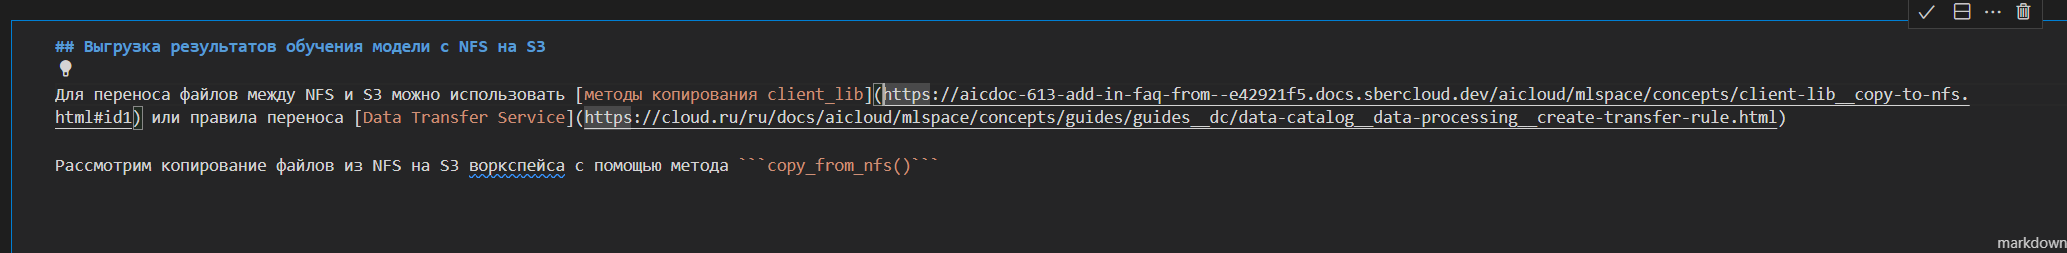) или [правила переноса Data Transfer Service](https://cloud.ru/ru/docs/aicloud/mlspace/concepts/guides/guides__dc/data-catalog__data-processing__create-transfer-rule.html)

Рассмотрим копирование файлов из NFS на S3 воркспейса с помощью метода ```copy_from_nfs()```.



In [34]:
relative_path = str(pathlib.Path().absolute().relative_to('/home/jovyan'))
client_lib.copy_from_nfs(
    source_path=f"{relative_path}/checkpoints_tf/mnist_convnet_model/", # укажем путь к папке logs без /home/jovyam 
    from_region=client_lib.RegionEnum.SR002_MT, # укажем регион, в нашем случае SR002-MT
    destination_path="quck-start" # укажем место назначения переноса
)

TransferData(id='544881fa-55b7-4f57-9b34-5ddb7293440a', created_transfer_data={'cluster_name': 'pd11', 'connector_id': '04930312-40ed-42d1-8d3a-ac510b0393d0', 'created': '2024-05-23T12:51:26.271409', 'description': 'Copy data from NFS. Called from jupyter client_lib', 'destination_connector_id': '0a30997d-b205-459e-9179-89d36a2ed0cf', 'destination_source_category': 's3mlspace', 'execution_date': None, 'modified': '2024-05-23T12:51:26.271409', 'name': 'from_nfs-f3a33149-df56-4346-8fd3-7d48afb7be6e-04930312-40ed-42d1-8d3a-ac510b0393d0', 'query': {'destination': 'quck-start', 'source': ['aicloud-examples/quick-start/job_launch_tf2/checkpoints_tf/mnist_convnet_model']}, 'source_category': 'nfs', 'strategy': 'write_all', 'system': False, 'transfer_id': '544881fa-55b7-4f57-9b34-5ddb7293440a', 'user_id': '4439ac3b-035e-490a-8df6-aba5b32a7695', 'workspace_id': '04930312-40ed-42d1-8d3a-ac510b0393d0'})

С помощью ID посмотрим логи переноса.

In [39]:
client_lib.get_transfer_data_logs("544881fa-55b7-4f57-9b34-5ddb7293440a") # id переноса берём из вывода предыдущей ячейки

[{'error': False,
  'message': 'Add source',
  'path': 'aicloud-examples/quick-start/job_launch_tf2/checkpoints_tf/mnist_convnet_model'},
 {'error': False,
  'message': 'Add object',
  'path': 'aicloud-examples/quick-start/job_launch_tf2/checkpoints_tf/mnist_convnet_model/checkpoint.ckpt.data-00000-of-00001'},
 {'error': False,
  'message': 'Add object',
  'path': 'aicloud-examples/quick-start/job_launch_tf2/checkpoints_tf/mnist_convnet_model/checkpoint.ckpt.index'},
 {'error': False,
  'message': 'Add object',
  'path': 'aicloud-examples/quick-start/job_launch_tf2/checkpoints_tf/mnist_convnet_model/checkpoint'},
 {'error': False,
  'message': 'Start transfer',
  'path': 'aicloud-examples/quick-start/job_launch_tf2/checkpoints_tf/mnist_convnet_model'},
 {'error': False, 'message': 'File transfer success', 'path': 'checkpoint'},
 {'error': False,
  'message': 'File transfer success',
  'path': 'checkpoint.ckpt.index'},
 {'error': False,
  'message': 'File transfer success',
  'path': 'c

В результате мы перенесли папку logs в S3 воркспейса в папку quick-start.

Чтобы проверить наличие файлов на S3, необходимо в разделе "Data Catalog" -> "Объектное Хранилище" выбрать бакет воркспейса с публичным доступом.